## Proceso de enfriamiento

### Introducción 

En este ejercicio se modela el proceso de enfriamiento de una taza de café caliente en una habitación. Usamos la Ley de Enfriamiento de Newton, que describe cómo la temperatura de un objeto cambia con el tiempo debido a la diferencia con la temperatura ambiente.

Para ello se utilizan herramientas científicas como `SciPy` y `Matplotlib`, que permiten modelar el problema, resolverlo numéricamente y visualizar su evolución. Se parte de una temperatura inicial alta y se calcula su descenso minuto a minuto, representando gráficamente el enfriamiento.

Esta actividad permite aplicar conceptos de modelado y visualización de datos en un caso cotidiano como el enfriamiento de una bebida caliente aunque, comprender cómo cambia la temperatura de un objeto a lo largo del tiempo también tiene implicaciones industriales, por ejemplo en los procesos térmicos o diseño de sistemas de refrigeración.


### Fundamento matemático

La ley de variación de la temperatura de Newton o más comunmente denominada como ley de enfriamiento de Newton describe cómo la temperatura de un objeto cambia con el tiempo debido a la diferencia con la temperatura ambiente.
Esta ley puede expresarse mediante la introducción de una constante $K>0$ con la siguiente ecuación diferencial:
$$ T'(t) = K(T_a - T(t))$$

Donde:
- $T(t)$: temperatura del objeto en un instante t.
- $T_{a}$: temperatura ambiente
- $K$: constante de enfriamiento positiva que depende de la naturaleza del objeto y las condiciones ambientales

Si la constante $K$ no se conoce de antemano se puede estimar con observaciones experimentales a partir de la fórmula de la solución explícita de la ley:
$$T(t) = T_{a} + (T_0 - T_{a}) e^{-kt}$$
despejando de la forma:
$$k = -\frac{1}{t} \ln\left( \frac{T(t) - T_{\text{amb}}}{T_0 - T_{\text{amb}}} \right)$$

### Desarrollo

Iniciamos importando las librerias que vamos a necesitar para resolver el ejercicio. En este caso:
- **scipy.integrate**: para trabajar con integrales
- **numpy**: para realizar el ajuste polinómico de la función
- **matplotlib**: para obtener la gráfica

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Una vez importadas las librerías, cargamos las variables con los valores que se usarán para resolver el problema:
- Temperatura inicial
- Temperatura ambiente
- Temperatura pasados 10 minutos
- Tiempo total

In [11]:
T_inicial = 90               
T_ambiental = 25          
T_10min = 60  
t_10 = 10
t_final = 60          

Hemos supuesto que la temperatura cuando pasan 10 minutos es de 60º para sacar una estimación de la constante k de forma teórica. Para mayor rigor esto se podría calcular experimentalmente.

In [12]:
k = -1/t_10 * np.log((T_10min - T_ambiental) / (T_inicial - T_ambiental))
print(f"Constante k = {k:.4f}")

Constante k = 0.0619


Una vez teniendo el valor de la constante, se quiere obtener cómo cambia la temperatura $T$ con el tiempo $t$, usando una función llamada `enfriamiento()` en la que se define la EDO. 

Luego, se usa la función `solve_ivp` de SciPy para resolver numéricamente esta ecuación diferencial. Esto integra esta ecuación a lo largo de un intervalo de tiempo especificado, partiendo de una temperatura inicial conocida. El resultado es una aproximación de los valores de temperatura en distintos instantes, que permite analizar el comportamiento del sistema y representarlo gráficamente de forma clara.

In [13]:
def enfriamiento(t, T):
    return k * (T_ambiental - T)

# Intervalo de tiempo y condición inicial
sol = solve_ivp(enfriamiento, [0, t_final], [T_inicial], t_eval=np.linspace(0, t_final, 100))

# Extraer tiempo y temperatura
tiempo = sol.t
temperatura = sol.y[0]

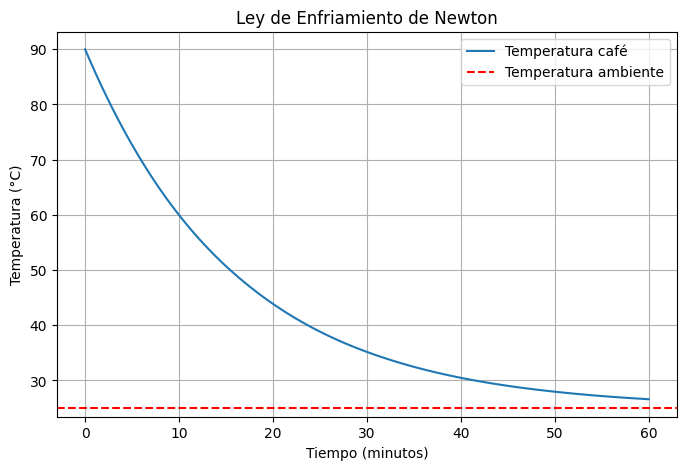

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(tiempo, temperatura, label="Temperatura café")
plt.axhline(y=T_ambiental, color='red', linestyle='--', label="Temperatura ambiente")
plt.xlabel("Tiempo (minutos)")
plt.ylabel("Temperatura (°C)")
plt.title("Ley de Enfriamiento de Newton")
plt.legend()
plt.grid(True)
plt.show()

### Interpretación

La gráfica muestra:
- Curva azul que representa como se comporta la temperatura respecto al tiempo
- Línea horizontal discontinua roja en $y = 25 °C$ que representa la temperatura ambiente.

Como se observa en el gráfico, la temperatura del café disminuye exponencialmente hasta aproximarse a la temperatura ambiente $T_{a} = 20^\circ C$. El ritmo de enfriamiento depende del valor de $k$, que en este caso se ha estimado que es 0.0619 1/minutos.